In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
df = pd.read_csv('processed_data.csv')
df.describe()

,mp10,mp2.5,dirviento,tamb,so2,velviento,hrel,no2,o3,nox,no,co,region,Year,Month,Day,lat,long
count,151917.000000,144669.000000,151917.00000,110480.000000,143551.000000,151917.000000,146650.000000,139930.000000,135158.000000,134586.000000,139930.000000,127138.000000,151917.000000,151917.00000,151917.000000,151917.000000,151917.000000,151917.000000
mean,55.948889,26.408093,169.44795,11.559792,3.561906,1.350698,66.001324,16.660862,15.718465,39.228736,23.819789,0.800704,1.155802,2013.61082,6.516479,15.731603,-32.858720,-70.770443
std,34.322277,23.770587,90.16143,5.568606,5.927205,1.240569,24.100927,13.962965,15.962653,42.543168,38.457210,0.855293,0.659285,7.00665,3.443059,8.796537,4.702516,1.606828
min,0.000000,0.000000,0.00000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.00000,1.000000,1.000000,-37.509146,-73.153204
25%,34.208300,12.750000,90.00000,8.752643,1.170000,0.486372,50.500000,6.478245,8.000000,11.896628,4.768615,0.295833,1.000000,2009.00000,4.000000,8.000000,-36.723690,-70.952996
50%,49.000000,19.333300,177.46900,11.716700,2.240280,1.006440,70.916400,12.646778,14.000000,23.512150,11.333300,0.530000,1.000000,2015.00000,7.000000,16.000000,-33.516667,-70.660702
75%,69.833300,32.208300,239.48100,14.709400,3.890000,1.854280,85.720000,23.416700,20.416700,52.415975,30.813895,0.983947,2.000000,2019.00000,10.000000,23.000000,-33.422261,-70.523256
max,917.940000,960.000000,360.00000,42.590000,406.845000,30.000000,105.000000,486.420000,500.496000,722.977000,2725.840000,22.210000,2.000000,2024.00000,12.000000,31.000000,-22.085846,-66.676393


In [3]:
df_Scaled=df.copy()

In [4]:
"""for column in df_Scaled.columns.difference(['Date','Day','Month','Year','region','station']): 
    df_Scaled[column] = df_Scaled[column]  / df_Scaled[column].abs().max()
    """

"for column in df_Scaled.columns.difference(['Date','Day','Month','Year','region','station']): \n    df_Scaled[column] = df_Scaled[column]  / df_Scaled[column].abs().max()\n    "

In [5]:
df_Scaled.describe()

,mp10,mp2.5,dirviento,tamb,so2,velviento,hrel,no2,o3,nox,no,co,region,Year,Month,Day,lat,long
count,151917.000000,144669.000000,151917.00000,110480.000000,143551.000000,151917.000000,146650.000000,139930.000000,135158.000000,134586.000000,139930.000000,127138.000000,151917.000000,151917.00000,151917.000000,151917.000000,151917.000000,151917.000000
mean,55.948889,26.408093,169.44795,11.559792,3.561906,1.350698,66.001324,16.660862,15.718465,39.228736,23.819789,0.800704,1.155802,2013.61082,6.516479,15.731603,-32.858720,-70.770443
std,34.322277,23.770587,90.16143,5.568606,5.927205,1.240569,24.100927,13.962965,15.962653,42.543168,38.457210,0.855293,0.659285,7.00665,3.443059,8.796537,4.702516,1.606828
min,0.000000,0.000000,0.00000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.00000,1.000000,1.000000,-37.509146,-73.153204
25%,34.208300,12.750000,90.00000,8.752643,1.170000,0.486372,50.500000,6.478245,8.000000,11.896628,4.768615,0.295833,1.000000,2009.00000,4.000000,8.000000,-36.723690,-70.952996
50%,49.000000,19.333300,177.46900,11.716700,2.240280,1.006440,70.916400,12.646778,14.000000,23.512150,11.333300,0.530000,1.000000,2015.00000,7.000000,16.000000,-33.516667,-70.660702
75%,69.833300,32.208300,239.48100,14.709400,3.890000,1.854280,85.720000,23.416700,20.416700,52.415975,30.813895,0.983947,2.000000,2019.00000,10.000000,23.000000,-33.422261,-70.523256
max,917.940000,960.000000,360.00000,42.590000,406.845000,30.000000,105.000000,486.420000,500.496000,722.977000,2725.840000,22.210000,2.000000,2024.00000,12.000000,31.000000,-22.085846,-66.676393


In [6]:
# Crear un diccionario para almacenar los datos de cada locación
df_Scaled.fillna(value=0,inplace=True)
grouped_data = {location: location_df.sort_values(by='Date') for location, location_df in df_Scaled.groupby('station')}

In [7]:
grouped_data

{'El_bosque':             mp10    station    mp2.5  dirviento     tamb   so2  velviento  \
 0     178.542000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 1     178.542000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 2     178.542000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 3     178.542000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 4     146.042000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 ...          ...        ...      ...        ...      ...   ...        ...   
 9497   79.782609  El_bosque  26.0000    108.825  13.1833  1.92   0.686534   
 9498   80.000000  El_bosque  26.0000    112.848  14.4167  1.72   0.475424   
 9499  100.000000  El_bosque  39.0000    163.922  14.3000  1.72   0.337289   
 9500  100.000000  El_bosque  39.0000    188.595  14.3083  1.72   0.457751   
 9501  100.000000  El_bosque  39.0000    137.223  10.5333  1.72   0.168721   
 
          hrel      no2       o3      nox       n

### Predicción del siguiente día en base a la semana anterior

In [8]:
sequence_length = 7  # Longitud de la secuencia para el LSTM
X, y = [], []

for location, location_df in grouped_data.items():
    # Convertir el DataFrame a una matriz de NumPy, excluyendo 'Date', 'Location' y 'mp10' de X
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    # Crear secuencias y etiquetas para cada locación
    for i in range(sequence_length, len(features)):
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))  # Secuencia de entrada
        y.append(tf.convert_to_tensor(target[i],dtype=tf.float32))  # 'mp10' como objetivo

# Convertir listas a arrays de NumPy
X, y = np.array(X), np.array(y)


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [10]:
# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=80, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=80))
model.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])




c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=10,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)


In [13]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0208 - mean_absolute_percentage_error: 12342.4043 - mean_squared_error: 9.2905e-04 - val_loss: 0.0240 - val_mean_absolute_percentage_error: 38401.7344 - val_mean_squared_error: 0.0017
Epoch 2/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0177 - mean_absolute_percentage_error: 15406.8076 - mean_squared_error: 7.0679e-04 - val_loss: 0.0242 - val_mean_absolute_percentage_error: 26561.9004 - val_mean_squared_error: 0.0018
Epoch 3/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0166 - mean_absolute_percentage_error: 10839.4180 - mean_squared_error: 6.3528e-04 - val_loss: 0.0239 - val_mean_absolute_percentage_error: 29899.9668 - val_mean_squared_error: 0.0017
Epoch 4/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0161 - mean_absolute_percentage_error: 18685.3340 - mean_squared_error: 6.2028e-04 - val_loss: 0.0247 - val_mean_absolute_percentage_error: 24342.5000 - val_mean_squared_error: 0.0018
Epoc

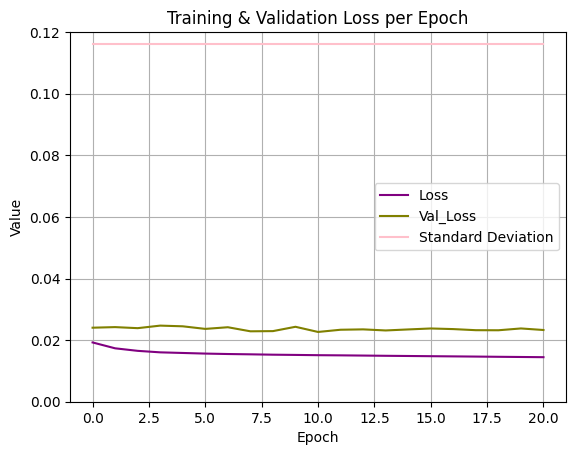

In [17]:
import matplotlib.pyplot as plt
s=[0.116]*21
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_whole.png',format='png')
# Muestra el gráfico
plt.show()

In [18]:
predictions=model.predict(X_test)

949/949 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Calcular MAE
mae = mean_absolute_error(y_test, predictions)
mse= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2 = r2_score(y_test, predictions)
def smape(y_true, y_pred):
    """
    Calcula el Symmetric Mean Absolute Percentage Error.
    """
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-6))

smape = smape(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"SMAPE: {smape}%")

MAE: 0.018178323283791542
MSE: 0.000734942383132875
R-squared: 0.4246612787246704
SMAPE: 28.950798511505127%


### Predicción del promedio de la siguiente semana en base a la semana anterior

In [26]:
df_Scaled=df.copy()
df_Scaled.fillna(value=0,inplace=True)
grouped_data = {location: location_df.sort_values(by='Date') for location, location_df in df_Scaled.groupby('station')}
sequence_length = 7  # Número de días anteriores a usar
prediction_length = 7  # Número de días a predecir (para el promedio)
X, y = [], []

for location, location_df in grouped_data.items():
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    
    for i in range(sequence_length, len(features) - prediction_length + 1):
        # Crear secuencia de entrada de `sequence_length` días
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))
        
        # Calcular el promedio de `mp10` para los próximos 7 días
        y.append(tf.convert_to_tensor(np.mean(target[i:i+prediction_length]),dtype=tf.float32))

# Convertir a arrays de numpy
X, y = np.array(X), np.array(y)

print(f"Forma de X: {X.shape}, Forma de y: {y.shape}")


Forma de X: (151540, 7, 17), Forma de y: (151540,)


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [28]:
# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=80, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(units=80))
model1.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model1.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Configurar Early Stopping
early_stopping1 = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=10,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Entrenar el modelo
history=model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])

Epoch 1/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0194 - mean_absolute_percentage_error: 35.8186 - mean_squared_error: 7.9961e-04 - val_loss: 0.0241 - val_mean_absolute_percentage_error: 51.2010 - val_mean_squared_error: 0.0016
Epoch 2/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0157 - mean_absolute_percentage_error: 27.9904 - mean_squared_error: 5.1796e-04 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 46.6689 - val_mean_squared_error: 0.0019
Epoch 3/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0146 - mean_absolute_percentage_error: 25.4983 - mean_squared_error: 4.5764e-04 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 49.1664 - val_mean_squared_error: 0.0020
Epoch 4/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0141 - mean_absolute_percentage_error: 24.0248 - mean_squared_error: 4.3823e-04 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 47.2654 - val_mean_squared_error: 0.0020
Epoch 5/50
6630/6630 ━━━━━━━

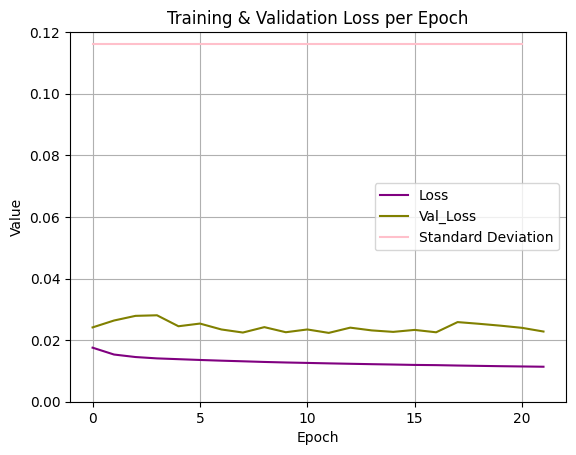

In [31]:
import matplotlib.pyplot as plt
s=[0.116]*21
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_whole.png',format='png')
# Muestra el gráfico
plt.show()

In [32]:
predictions=model1.predict(X_test)

948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [33]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Calcular MAE
mae = mean_absolute_error(y_test, predictions)
mse= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2 = r2_score(y_test, predictions)
def smape(y_true, y_pred):
    """
    Calcula el Symmetric Mean Absolute Percentage Error.
    """
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-6))

smape = smape(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"SMAPE: {smape}%")

MAE: 0.019081635400652885
MSE: 0.0007469523698091507
R-squared: 0.3320789933204651
SMAPE: 24.796637892723083%
